# Boxes.py example

This notebook is an interactive example of a Boxes.py generator. Feel free to play around and see how the result changes.

Check out http://florianfesti.github.io/boxes/html/index.html for documentation.

In [4]:
from IPython.display import SVG, display
import tempfile, os

import sys
#sys.path.append('..') # uncomments and adjust if your Boxes.py copy in not in the Python path
from boxes import *

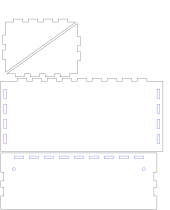

In [5]:
class Example(Boxes): # Adjust class name and call below
    """Example: Single Shelve to screw to the wall"""

    ui_group = "Shelves" # change for generators belonging in another group
    
    def __init__(self):
        Boxes.__init__(self)
        # arguments
        self.addSettingsArgs(edges.FingerJointSettings, finger=3.0) # arguments for finger joints
        self.buildArgParser(x=150, y=70, h=50)
        self.argparser.add_argument(
            "--hole_dist", action="store", type=float, default=10.,
            help="distance of the mounting holes to the boards")
        self.argparser.add_argument(
            "--hole_dia", action="store", type=float, default=3., # can't use "hole" as param name as it is a method
            help="diameter of the mounting holes")
        
    def render(self):
        x, y, h = self.x, self.y, self.h
        t = self.thickness
        
        # render-magic goes here
        
        hole = lambda: self.hole(self.hole_dist, self.hole_dist, d=self.hole_dia) # use lambda as a callback
        # holes are placed relative to the inner rectangle of the back wall. The top part with the finger holes and 
        # the finges at the sides do not count.
        # Callbacks start in the bottom left corner. Place holes in the third and forth corners only.       
        self.rectangularWall(x, h, "eFhF", move="up", callback=[None, None, hole, hole]) # back board

        self.rectangularWall(x, y, "ehfh", move="up") # top board
        self.rectangularTriangle(y, h, "ff", num=2) # braces        
        

b = Example()
fd, fn = tempfile.mkstemp()
b.parseArgs(['--reference=0', '--debug=0', '--output=' + fn])
b.open()
b.render()
b.close()

display(SVG(fn))
os.close(fd)
os.remove(fn)